In [1]:
pip install yfinance # for getting ohlcv data

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install mplfinance # for plotting renko charts 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [8]:
import datetime as dt
import yfinance as yf
import pandas as pd
import mplfinance as fplt

In [9]:
start_date = dt.datetime.today()- dt.timedelta(1825) # getting data for 1825(around 5 years of data) days --> timedelta is difference in time
end_date = dt.datetime.today()
ticker_name = "TCS.NS"
ohlcv = yf.download(ticker_name, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [10]:
ohlcv

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-04,1186.650024,1190.224976,1175.025024,1183.425049,1080.592163,1215134
2017-07-05,1180.400024,1182.500000,1172.500000,1178.000000,1075.638062,815856
2017-07-06,1179.500000,1180.949951,1170.050049,1173.775024,1071.780518,1026788
2017-07-07,1175.000000,1178.224976,1162.750000,1165.974976,1064.658447,1232090
2017-07-10,1203.000000,1222.449951,1189.474976,1217.474976,1111.683105,783608
...,...,...,...,...,...,...
2022-06-27,3350.000000,3362.899902,3306.500000,3314.699951,3314.699951,2037686
2022-06-28,3307.000000,3330.000000,3272.600098,3318.149902,3318.149902,1400046
2022-06-29,3271.000000,3333.000000,3271.000000,3290.500000,3290.500000,2133994


In [11]:
# Function to calculate average true range
def ATR(DF, n):
  df = DF.copy() # making copy of the original dataframe
  df['H-L'] = abs(df['High'] - df['Low']) 
  df['H-PC'] = abs(df['High'] - df['Adj Close'].shift(1))# high -previous close
  df['L-PC'] = abs(df['Low'] - df['Adj Close'].shift(1)) #low - previous close
  df['TR'] = df[['H-L','H-PC','L-PC']].max(axis =1, skipna = False) # True range
  df['ATR'] = df['TR'].rolling(n).mean() # average –true range
  df = df.drop(['H-L','H-PC','L-PC'], axis =1) # dropping the unneccesary columns
  df.dropna(inplace = True) # droping null items
  return df

In [12]:
ATR(ohlcv,50)

,Open,High,Low,Close,Adj Close,Volume,TR,ATR
Date,,,,,,,,
2017-09-14,1241.000000,1248.800049,1235.949951,1243.474976,1138.623291,1081510,109.146484,117.494868
2017-09-15,1249.500000,1258.500000,1242.500000,1253.025024,1147.368286,2944072,119.876709,117.854246
2017-09-18,1252.474976,1259.474976,1244.625000,1249.525024,1144.163086,726600,112.106689,117.990142
2017-09-19,1252.500000,1252.500000,1245.750000,1249.125000,1143.796997,782754,108.336914,118.027991
2017-09-20,1257.000000,1257.000000,1237.150024,1246.775024,1141.645264,1334642,113.203003,117.136221
...,...,...,...,...,...,...,...,...
2022-06-27,3350.000000,3362.899902,3306.500000,3314.699951,3314.699951,2037686,69.799805,83.001035
2022-06-28,3307.000000,3330.000000,3272.600098,3318.149902,3318.149902,1400046,57.399902,81.850073
2022-06-29,3271.000000,3333.000000,3271.000000,3290.500000,3290.500000,2133994,62.000000,80.602070


In [13]:
bricks = round(ATR(ohlcv,50)["ATR"][-1],0) # Using default 50 days rolling average.

In [14]:
bricks

79.0

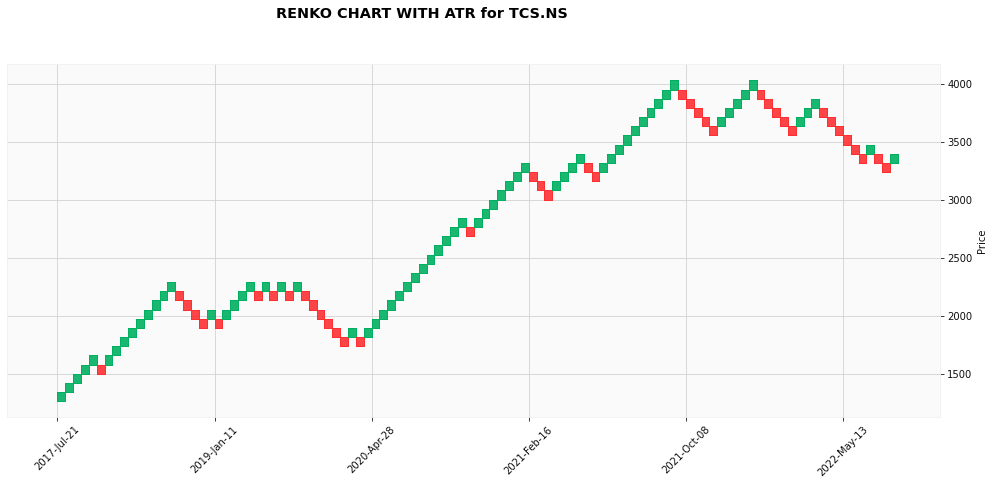

In [15]:
fplt.plot(ohlcv,type='renko',renko_params=dict(brick_size=bricks, atr_length=14),
          style='yahoo',figsize =(18,7),
          title = "RENKO CHART WITH ATR for {0}".format(ticker_name))